In [ ]:
import os
import numpy as np

os.chdir('..')

import torch



In [ ]:
def plot()


def plot_results(start_idx, end_idx, to_plot, prefix, title, plot_all=False):
    dicts = []
    for i in range(start_idx, end_idx+1):
        dictionary = torch.load(f'./outputs/{prefix}_run{i}')
        dicts.append(dictionary)

    if to_plot == 'val':
        values = [dictionary['val_accs'] for dictionary in dicts]
    elif to_plot == 'train':
        values = [dictionary['train_losses'] for dictionary in dicts]

    values_np = np.asarray(values)
    avgs = values_np.mean(axis=0)
    stds = values_np.std(axis=0)

    x = [i for i in range(len(avgs))]
    plt.figure()
    plt.plot(x, avgs, 'k')
    plt.fill_between(x, avgs-stds, avgs+stds,
        alpha=0.2, facecolor='#089FFF',
        linewidth=4, antialiased=True)
    if to_plot == 'val':
        plt.ylim(0.5, 1)
        plt.ylabel('Classification Accuracy')
        plt.xlabel('Epochs')
    elif to_plot == 'train':
        plt.ylabel('Train Loss')
        plt.xlabel('Train Steps')
    
    plt.title(title)
    
    if plot_all:
        plt.plot(values_np.T)
    plt.show()


In [69]:
!pwd

/Users/admin/Documents/Research/SSL/matrixssl-inductive


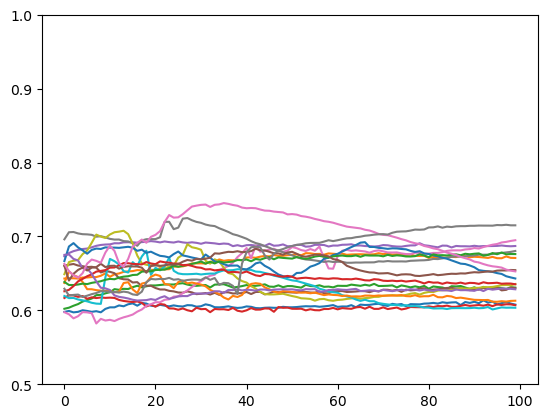

In [79]:
import os
import matplotlib.pyplot as plt
plt.figure(1)
plt.ylim(0.5, 1)
for file in os.listdir('./outputs/old/add_runs1/'):
    filepath = os.path.join('./outputs/old/add_runs1', file)
    d_dict = torch.load(filepath)
    val_accs = d_dict['val_accs']
    plt.plot(val_accs)
    
# very disappointing....
# optim:{SGD, ADAM}, lr:{1e-6 5e-6 1e-5}, wd:{1e-6 5e-6 1e-5}

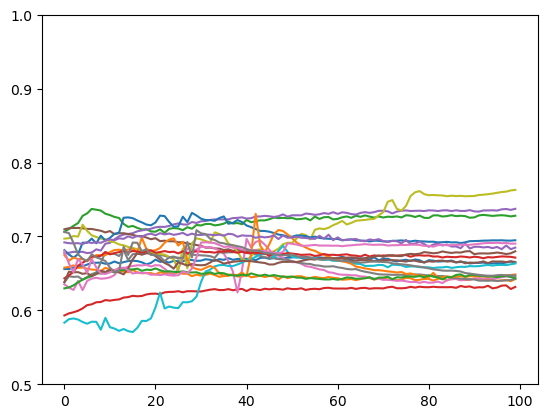

In [81]:
plt.figure(1)
plt.ylim(0.5, 1)
for file in os.listdir('./outputs'):
    if file == 'old':
        continue
    filepath = os.path.join('./outputs', file)
    d_dict = torch.load(filepath)
    val_accs = d_dict['val_accs']
    plt.plot(val_accs)